<a href="https://colab.research.google.com/github/aachyuthh/SRIP-IITGN/blob/main/AchyuthP_SRIP_IITGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import numpy as np

import jax.numpy as jnp
import jax
from jax import vmap,jit

import torch
from torch.utils.data import Dataset, DataLoader

import os

from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec

import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable


In [106]:
from jax.scipy.linalg import cholesky

In [2]:
import ipywidgets as widgets

In [3]:
seed = 0

#Animate Bivariate Normal Distribution

**Multivariate normal distribution** is a multidimensional generalisation of univariate normal distribution( the ***normal*** normal distribution. 
The univariate normal distribution is based on a single random variable **X** and is depenedent on 2 parameters - the mean and variance of the sample.



##Univariate Normal Distribution

The probability distribution function(pdf) of a random variable following normal distribution of mean μ and variance σ is given by
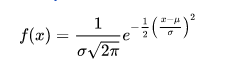

In [38]:
def uni_normal(x, mu, var):
  '''

    This function serves the purpose of scipy.stats.norm(x, mean, std)

    mu and var are the 2 parameters for a normal distribution
    var is taken as input not standard deviation

  '''
  return ( 1/(jnp.sqrt(2*jnp.pi*var)) * jnp.exp( -0.5*( (x-mu)**2/var ) ) )



(250,) (250,)


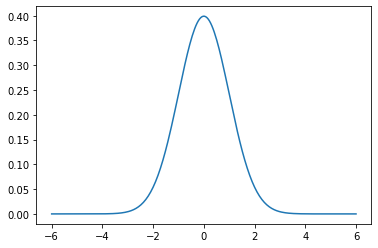

In [39]:
key = jax.random.PRNGKey(seed)

x1 = jnp.linspace(-6,6,250)
y1 = uni_normal(x1,0,1)
print(x1.shape,y1.shape)
plt.plot(x1,y1)

## Widgets for playing around with Univariate Distribution

In [40]:
mu1 = widgets.FloatSlider(value = 0, min =-3, max = 3, description = "Mean")
var1 = widgets.FloatSlider(value = 1, min =0, max = 2, description = "Variance")

from IPython.display import display
from ipywidgets import interact, fixed

display(mu1)
display(var1)


FloatSlider(value=0.0, description='Mean', max=3.0, min=-3.0)

FloatSlider(value=1.0, description='Variance', max=2.0)

In [41]:
def plot_with_widget(x, mu, var):
  y = ( 1/(jnp.sqrt(2*jnp.pi*var)) * jnp.exp( -0.5*( (x-mu)**2/var ) ) )
  plt.plot(x,y)
  



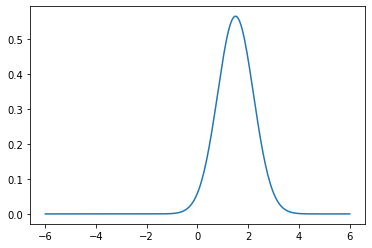

In [44]:
#USe the slider above to manipulate mean and variance and run this cell to get the results

plot_with_widget(x1,mu1.value,var1.value)

In [45]:
#Jusr use the slider here to see changes in the distribution

interact(plot_with_widget,x = fixed(x1),mu = mu1,var = var1)

interactive(children=(FloatSlider(value=1.5, description='Mean', max=3.0, min=-3.0), FloatSlider(value=0.5, de…

<function __main__.plot_with_widget>

## Animate Bivariate Normal Distribution

A random variable 𝐗 = ($X_1,X_2....X_k)$ is said to follow multivariate normal distribution if every linear combination $\sum_{i=1}^{k} a_iX_i$ is normally distributed
P.S. This does not mean sum of 2 random variables $X_1$ and $X_2$ follows a multivariate normal distribution

The joint probability density is given by:
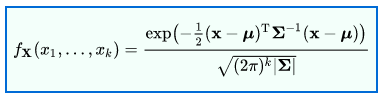

Like univariate distribution, multivariate normal distribution also has 2 parameters - <br>
the mean vector $\mu$ of shape (k,1) and covariance matrix $𝚺$ of shape $d 𝖷 d$ and <br>
|𝚺| denotes the determinant of the covariance matrix. <br>
The covariance matrix is supposed to be a symmetric, positive definite matrix i.e the eigen values of the matrix are all positive 

In [46]:
def multivariate_normal(x, mu, var):
  '''
    x is a k-dimensional vector
    mu is also a k-dimensional vector
    var is a kxk correlation matrix

    It should be noted both x and mu are column vectors - kx1
  '''
  k = x.shape[0]
  det = np.linalg.det(var)
  inv = np.linalg.inv(var)
  temp = np.dot((x-mu).T,inv)
  pdf =  (1/np.sqrt( ((2*np.pi)**k )*det)  )  * np.exp(-0.5*(np.dot(temp,x-mu)) )
  return pdf


In [47]:
bivariate_mean = np.array([[0.], [0.]])  # Mean
bivariate_covariance = np.array([
    [1., 0.], 
    [0., 1.]])
x = np.array([[0.5],[-0.5]])
multivariate_normal(x,bivariate_mean,bivariate_covariance)

array([[0.12394999]])

In [49]:
def plot_contours(mu1, var1 , grid_size,ax):
  '''
    The function takes in the grid_size as an argument and a grid along with the respective x1 and x2 are estimated , the pdf of each point in the grid is calculated
    with respect to the mean and var, with the multivariate_normal function.
    matplotlib.contourf is used to form the contour 

    mu1 ---> ndarray : mean vector of multivariate random variable X
    var ---> ndarray : covariance matrix of multivariate random variable X
    gridsize ---> int : grid size for the x1,x2 
    ax ---> pyplot axis object to plot the contour
  '''
  x1_temp = np.linspace(-5,5,grid_size)
  x2_temp = np.linspace(-5,5,grid_size)
  x1,x2 = np.meshgrid(x1_temp,x2_temp)
  pdf1 = np.zeros((grid_size,grid_size))

  for i in range(0,grid_size):
    for j in range(0,grid_size):
      x_temp = np.array([ [ x1[i][j] ] ,[ x2[i][j] ] ])
      pdf1[i][j] = multivariate_normal(x_temp, mu1,var1)
  
  plot = ax.contourf(x1, x2, pdf1, 33, cmap=cm.YlGnBu)

  plt.show  


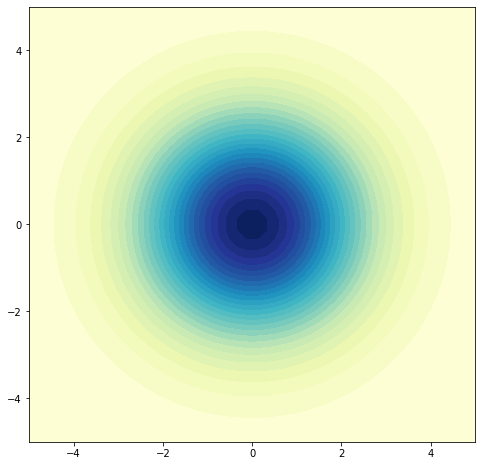

In [109]:


'''Trial run with mean mu = [[0],[0]] and covariance = 
          [
            [1,0],
            [0,1]
          ]
'''
mu1 = [[0],[0]]
var1 = [
        [3,0],
        [0,3]
    ]   



fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,8))

plot_contours(mu1,var1,50,ax1)


In [100]:
def plot_contours_bivariate(mu_0, mu_1, var , grid_size):
  '''
    The function takes in the grid_size as an argument and a grid along with the respective x1 and x2 are estimated , the pdf of each point in the grid is calculated
    with respect to the mean and var, with the multivariate_normal function.
    matplotlib.contourf is used to form the contour 

    mu_0 ---> float : mean of X1
    mu_1 ---> float : mean of X2 
    var ---> float : covariance between X1 and X2

          mean vector = [ [mu_0] , [mu_1] ]
          covariance matrix =  [ [ 1 , var ]

                                 [ var , 1 ]  ]


        Egs:mu1 = [[0],[0]]
            var1 = [
                      [1,0],
                      [0,1]   ]   , here mu_0 = 0, mu_1 =0, var= 0

    gridsize ---> int : grid size for the x1,x2 
    ax ---> pyplot axis object to plot the contour
  '''
  x1_temp = np.linspace(-5,5,grid_size)
  x2_temp = np.linspace(-5,5,grid_size)
  x1,x2 = np.meshgrid(x1_temp,x2_temp)
  pdf1 = np.zeros((grid_size,grid_size))

  mu1 = np.array( [ [mu_0] , [mu_1] ])
  var1 = np.array( [ [1, var], 
                     [var,1] ] )

  for i in range(0,grid_size):
    for j in range(0,grid_size):
      x_temp = np.array([ [ x1[i][j] ] ,[ x2[i][j] ] ])
      pdf1[i][j] = multivariate_normal(x_temp, mu1,var1)
  
  
  # fig = plt.figure(figsize=(7, 7))
  gs = gridspec.GridSpec(
      2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
  plt.suptitle('Marginal distributions', y=0.93)

  # Plot surface on top left
  ax1 = plt.subplot(gs[0])
  # Plot bivariate distribution
  con = ax1.contourf(x1, x2, pdf1, 33, cmap=cm.YlGnBu)
  ax1.set_xlabel('$x$', fontsize=13)
  ax1.set_ylabel('$y$', fontsize=13)
  ax1.yaxis.set_label_position('right')
  # ax1.axis([-2.5, 2.5, -1.5, 3.5])

  #Marginal Distributions
  x1 = np.linspace(-5, 5, num=50)
  p_x1 = uni_normal(x1, mu_0, 1)

  x2 = np.linspace(-5, 5, num=50)
  p_x2 = uni_normal(x2, mu_1, 1)

  #plot pdf of x1 bottom left
  ax2 = plt.subplot(gs[2])
  ax2.plot(x1,p_x1,'r--',label=f'$p(x_1)$')
  ax2.legend(loc=0)
  ax2.set_ylabel('marginal distribution of x1', fontsize=10)
  ax2.yaxis.set_label_position('right')
  ax2.set_xlim(-5, 5)

  #plot pdf of x2 top right
  ax3 = plt.subplot(gs[1])
  ax3.plot(p_x2,x2,'b--',label=f'$p(x_2)$')
  ax3.legend(loc=0)
  ax3.set_ylabel('marginal distribution of x2', fontsize=10)
  ax3.yaxis.set_label_position('right')
  ax3.set_ylim(-5, 5)
  
  
  # Fill bottom right with color bar
  ax4 = plt.subplot(gs[3])
  ax4.set_visible(False)
  divider = make_axes_locatable(ax4)
  cax = divider.append_axes('left', size='20%', pad=0.05)
  cbar = fig.colorbar(con, cax=cax)
  cbar.ax.set_ylabel('density: $', fontsize=10)
  plt.show()




In [88]:
#mean vector
mu_0_widget = widgets.FloatSlider(value = 0, min =-5, max = 5, description = "Mean of X1")
mu_1_widget = widgets.FloatSlider(value = 0, min =-5, max = 5, description = "Mean of X2")
#Covariance Vector
var_widget = widgets.FloatSlider(value =0, min =0, max = 0.99, description = "Covariance between X1 and X2")

def display_parameters(mu_0,mu_1,var):
  print(f"Mean Vector:  [ {mu_0} , {mu_1} ]")
  print(f"Mean Vector: [ [ 1.0 , {var} ]")
  print(f"Mean Vector:   [ {var} , 1.0 ] ]")

interact(display_parameters, mu_0 = mu_0_widget, mu_1 = mu_1_widget, var = var_widget)



interactive(children=(FloatSlider(value=0.0, description='Mean of X1', max=5.0, min=-5.0), FloatSlider(value=0…

<function __main__.display_parameters>

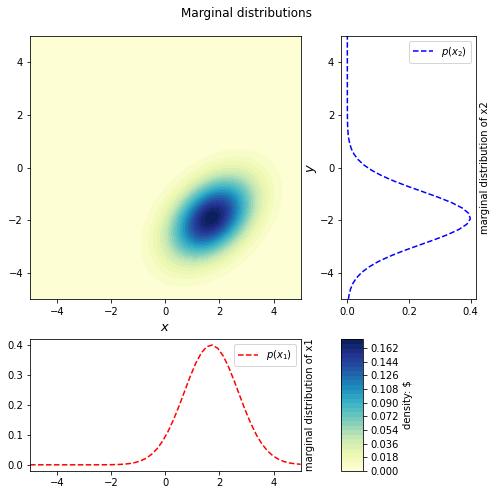

In [101]:
#USe the slider above to manipulate mean and variance and run this cell to get the results

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(8,8))


plot_contours_bivariate(mu_0_widget.value, mu_1_widget.value, var_widget.value , 50)

In [102]:
#Just use the slider here to see changes in the joint probability and marginal probabilities in a few seconds

interact(plot_contours_bivariate, mu_0 = mu_0_widget, mu_1 = mu_1_widget, var = var_widget, grid_size = fixed(50) )

interactive(children=(FloatSlider(value=1.7, description='Mean of X1', max=5.0, min=-5.0), FloatSlider(value=-…

<function __main__.plot_contours_bivariate>

#Sampling from multivariate normal distribution

Steps employed to sample from a MVN distibution;
  *  For a given mean vector of size $d$ x $1$ and covariance matrix of size $d$ x $d$, we need to sample a X vector of size $d$ x $1$ from such a distribution
  *  For a given positive definite and symmetric co-variance matrix $K_0$, we need to calculate the **CHOLESKY DECOMPOSITION** $L$ - which is essentially an upper or lower-triangular matrix, such that $K_0 = L . L^T$ 


  * Having obtained the Cholesky decomposition, compute $μ + Lu$, this would be a sample from the MVN distribution of mean μ and co variance $K_0$.   
  *   Since jax.random.normal is not available, a standard normal sample would have to be sampled too - **BOX MULLER** approach would be used for this





In [183]:
m = np.array([[1],[2]])
K = np.array([[2,1],[1,2]])

L = cholesky(K)

In [115]:
np.dot(L.T,L)

array([[1.9999999 , 0.99999994],
       [0.99999994, 2.        ]], dtype=float32)

In [126]:
d,n = 2,1000

u = np.random.normal(loc=0, scale=1, size=d*n).reshape(d,n)
u.shape

x = m + np.dot(L, u)
x[0].shape

(1000,)

For a bivariate normal distribution, the following plot is the expected result, this can be used a metric to test our sampling function

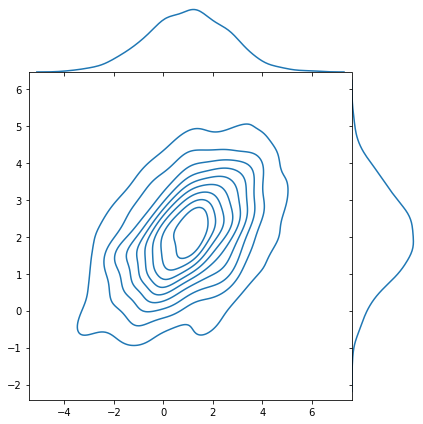

In [124]:
sns.jointplot(x=x[0], y=x[1], kind="kde", space=0);


### Box Muller Approach to sample from normal distribution

This mainly revolves around a very interesting concept -<BR/> **FOR ANY DISTRIBUTION, THE CUMULATIVE PROBABILITY DISTRIBUTON FOLLOWS A UNIFORM DISTRIBUTION** <BR/>

Essentially, the box muller algorithm takes in 2 uniformly distributed samples ~$U(0,1)$ and gives out 2 normally distributed samples ~$N(0,1)$


(array([108.,  91., 105., 103.,  92.,  99., 105.,  99., 103.,  95.]),
 array([5.4979324e-04, 1.0042624e-01, 2.0030269e-01, 3.0017915e-01,
        4.0005559e-01, 4.9993205e-01, 5.9980851e-01, 6.9968498e-01,
        7.9956138e-01, 8.9943784e-01, 9.9931431e-01], dtype=float32),
 <a list of 10 Patch objects>)

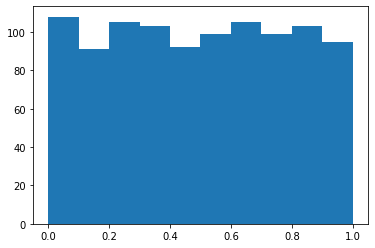

In [157]:
key_1 =  jax.random.PRNGKey(123)
key_2 =  jax.random.PRNGKey(214)

u1,u2 = jax.random.uniform(key_1, shape=(1000,), minval = 0.0, maxval = 1.0), jax.random.uniform(key_2, shape=(1000,), minval = 0.0, maxval = 1.0)

def Box_Muller(u1,u2):
  '''
   u1 and u2 are the 2 uniformly distributed samples
   Returns: n1 and n2 - 2 normally distributed samples
  '''
  return (jnp.sqrt(-2 * jnp.log(u1)) * jnp.cos(2*jnp.pi*u2), jnp.sqrt(-2 * jnp.log(u1)) * jnp.sin(2*jnp.pi*u2) )
  
  


plt.hist(u2)

(1000,)


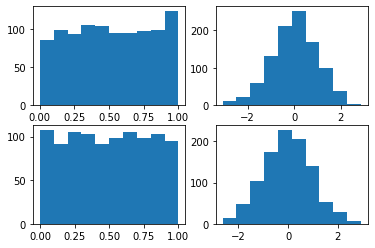

In [168]:
x1,x2 = Box_Muller(u1,u2)

fig,axs = plt.subplots(2,2)
axs[0,1].hist(x1)
axs[1,1].hist(x2)
axs[0,0].hist(u1)
axs[1,0].hist(u2)

# temp1,temp2 = jax.random.uniform(key_1,(1,)), jax.random.uniform(key_1,(1,))
# print(Box_Muller(temp1,temp2))
print(x1.shape)

### Sampling Function

In [188]:
def sample(d,N,mu,K,key):
  '''
        d ---> dimension of the multivariate random variable
        N ---> number of samples required
        mu ---> mean dx1 vector
        K ---> variance dxd matrix
        key ---> key to sample from uniform distribution
  '''

  L = cholesky(K)
  key1,key2 = jax.random.split(key,num = 2)
  u1,u2 = jax.random.uniform(key1, shape=(d,N), minval = 0.0, maxval = 1.0), jax.random.uniform(key2, shape=(d,N), minval = 0.0, maxval = 1.0)

  x1,x2 = Box_Muller(u1,u2)   #x1,x2 are standard normal samples. dxN matrix

  L = cholesky(K)

  x = mu + np.dot(L, x1)



  return x

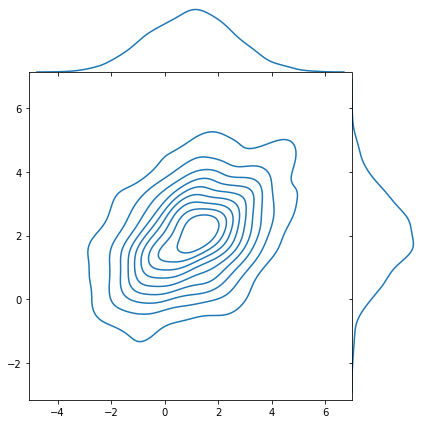

In [172]:
#Using same parameters as earlier

d,N = 2,1000

m = np.array([[1],[2]])
K = np.array([[2,1],[1,2]])

key = jax.random.PRNGKey(seed)

test = sample(d,N,m,K,key)

sns.jointplot(x=test[0], y=test[1], kind="kde", space=0);


The mean vector and covariance matrix for an n-dimensional random variable is generated using the below function. It should be noted the covariance matrix should be positive definite. This is done so by generating a random matrix M, then the K is initialised as $M.M^T$, this essentially means the random matrix M is the cholesky of the generated covariance matrix

In [195]:
def generate_mu_and_k(d,key):
  key1,key2 = jax.random.split(key,num = 2)
  mu = jax.random.uniform(key1, shape= (d,1))
  temp_matrix = jax.random.uniform(key2, shape= (d,d))

  K = jnp.dot(temp_matrix,temp_matrix.T)

  return mu,K


mean, covariance = generate_mu_and_k(10,key)

DeviceArray([[0.0045197 ],
             [0.5135027 ],
             [0.8613342 ],
             [0.06939673],
             [0.6875638 ],
             [0.85599923],
             [0.706004  ],
             [0.50679076],
             [0.6072922 ],
             [0.6199024 ]], dtype=float32)

In [200]:
d,N = 10,1000

samples = sample(d,N,mean,covariance,key)

observed_mean = samples.mean(axis=1)
observed_k = jnp.cov(samples)

print(f'The actual mean of the sample space, input to the function: \n{mean}')
print(f'The calculated mean as per the samples generated using sample function: \n{observed_mean}')

print(f'The actual covariance of the sample space, input to the function: \n{covariance}')
print(f'The calculated mean as per the samples generated using sample function: \n{observed_k}')



The actual mean of the sample space, input to the function: 
[[0.0045197 ]
 [0.5135027 ]
 [0.8613342 ]
 [0.06939673]
 [0.6875638 ]
 [0.85599923]
 [0.706004  ]
 [0.50679076]
 [0.6072922 ]
 [0.6199024 ]]
The calculated mean as per the samples generated using sample function: 
[0.10526367 0.54281324 0.84426373 0.0639572  0.7203185  0.8539151
 0.7230889  0.51533437 0.60244524 0.632194  ]
The actual covariance of the sample space, input to the function: 
[[5.783413  2.7517426 3.9042354 2.9406204 3.769911  5.1048956 3.7411938
  5.844817  2.7187746 4.4025826]
 [2.7517426 2.253652  2.3267453 2.2353752 1.931128  3.0893915 2.3837519
  3.5224009 1.8559688 2.6733243]
 [3.9042354 2.3267453 4.7375274 2.738657  2.9219723 4.380641  3.479549
  4.8822837 2.51001   4.372005 ]
 [2.9406204 2.2353752 2.738657  2.7180753 1.9141549 3.3591654 2.4878466
  3.8730881 2.086663  2.9490738]
 [3.769911  1.931128  2.9219723 1.9141549 3.0195374 3.7393577 2.843386
  4.129057  2.085702  3.0733302]
 [5.1048956 3.0893915 4

The mean vectors in comparison are in range, with a maximum error of 0.06, but the covariance matrix as per the generated samples is well off range of the true covariance. <br/>
I'm not sure about the reason for this error, it has to be looked into.

#Neural Nets from scratch using JAX

In [11]:
from torchvision import datasets, transforms

batch_size = 128

dataset_train = datasets.MNIST(root='../data', download=True, train = True, transform= transforms.Compose([transforms.Lambda(lambda x: np.ravel(np.array(x, dtype=np.float32))) ]))
dataset_test = datasets.MNIST(root='../data', download=True, train = False, transform= transforms.Compose([transforms.Lambda(lambda x: np.ravel(np.array(x, dtype=np.float32))) ]))


train_loader = DataLoader(dataset_train, batch_size, shuffle=True, collate_fn = custom_collate_fn, drop_last=True)
test_loader = DataLoader(dataset_test, batch_size, shuffle=False, collate_fn = custom_collate_fn, drop_last=True)

# test
batch_data = next(iter(train_loader))
imgs = batch_data[0]
lbls = batch_data[1]
print(imgs.shape, imgs[0].dtype, lbls.shape, lbls[0].dtype)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

(128, 784) float32 (128,) int64


In [173]:
# optimization - loading the whole dataset into memory
train_images = jnp.array(dataset_train.data).reshape(len(dataset_train), -1)
train_labels = jnp.array(dataset_train.targets)

test_images = jnp.array(dataset_test.data).reshape(len(dataset_test), -1)
test_labels = jnp.array(dataset_test.targets)

test_labels.shape

(10000,)

In [20]:


def accuracy(parameters, imgs, labels):
    final_pred = jnp.argmax(batch_predict(parameters,imgs), axis=1)
    return jnp.mean(labels == final_pred)

def custom_collate_fn(batch):
    transposed_data = list(zip(*batch))

    labels = np.array(transposed_data[1])
    imgs = np.stack(transposed_data[0])

    return imgs, labels



In [30]:
def JAX_NN_init(layer_widths ,key):
    '''
      layer_widths ---> list - list of the layer widths
                              [784,128,128,10]
      key ---> jax.random.PRNGKey - to initialise random weights to the neural net parameters
    '''
    count = len(layer_widths)

    params = []

    #Since there are count number of layers, the weights for each layer-layer interaction would have to initialsed with a different key, jax.random.split(key, num)
    # is used to generate separate keys
    #params would be a list of weights and biases in the following way
    # [ [784x128,1x128], [128x128,1x128], [128x10,1x10] ]

    layer_keys = jax.random.split(key,num = count-1)

    for in_layer,out_layer,layer_key in zip(layer_widths[:count-1],layer_widths[1:],layer_keys):
        
        #weights and bias are defined separately so again 2 separate keys for each in_layer - out_layer weights
        key1,key2 = jax.random.split(layer_key,num = 2)

        params.append(
            [0.01*jax.random.normal(key1,shape = (out_layer,in_layer)),
            0.01*jax.random.normal(key2,shape = (out_layer,))]
        )

    return params

In [21]:
from jax.scipy.special import logsumexp


def predict_utility(params, x):
    output = x
    for weight,bias in params[:-1]:
      output = jax.nn.relu(jnp.dot(weight,output) + bias)
    
    weight_final, bias_final = params[-1]
    output = jnp.dot(weight_final,output) + bias_final

    return output- logsumexp(output)

batch_predict = vmap(predict_utility, in_axes = (None,0))

In [22]:
key = jax.random.PRNGKey(seed)
test_params = JAX_NN_init([784,256,256,10],key)
#params variable of a layer can be considered as a pytree, this makes the grad calculations easier; this facilitates the use of jax.tree_map() too
#In a pytree, a device array or a jnp array is considered an object ( not a recursive pytree, unlike a normal list or dictionary)
print(jax.tree_map(lambda leaf:leaf.shape, test_params))


[[(256, 784), (256,)], [(256, 256), (256,)], [(10, 256), (10,)]]


In [23]:

dummy_imgs_flat = jax.random.normal(key, (16,784))
print(dummy_imgs_flat.shape)
# predictions = batched_MLP_predict(l.params ,dummy_imgs_flat)
predictions = batch_predict(test_params,dummy_imgs_flat)
print(predictions.shape)

(16, 784)
(16, 10)


In [29]:
def loss_fn_MSE(parameters, x, y):
  prediction = batch_predict(parameters,x)
  # return jnp.mean((prediction - y) ** 2)
  return -jnp.mean(prediction * y)

def update(parameters, x, y,lr):
  loss, grads = jax.value_and_grad(loss_fn_MSE)(parameters, x,y)

  updated = jax.tree_multimap(lambda param, grad: param - lr * grad, parameters, grads)
  return loss,updated

In [175]:
def train(model_params,epochs,lr, train_loader):

    training_loss = []
    training_acc_list = []
    test_acc_list = []
    iter= []
    counter = 0

    for epoch in range(epochs):

        for index, (imgs, labels) in enumerate(train_loader):

            one_hot_labels = jax.nn.one_hot(labels, 10)
            
            loss, model_params = update(model_params, imgs, one_hot_labels, lr)
            
            if index % 50 == 0:
                print(loss)

            training_loss.append(loss)
            iter.append(counter)
            counter+= 1


        train_acc, test_acc = accuracy(model_params,train_images, train_labels), accuracy(model_params,test_images, test_labels)
        training_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'Epoch {epoch}, train acc = {train_acc} test acc = {test_acc}') 

    fig, axs = plt.subplots(2,2)
    
    axs[0,0].plot(iter,training_loss)
    axs[1,0].plot(range(epochs), training_acc_list)
    axs[1,1].plot(range(epochs), test_acc_list)

0.23044327
0.061408114
0.016992373
0.031205386
0.021016335
0.01787089
0.013992402
0.016573275
0.02179177
0.0282278
Epoch 0, train acc = 0.9605666995048523 test acc = 0.9569000005722046
0.016417822
0.015696436
0.009077636
0.01867073
0.005052063
0.01880977
0.018405134
0.005519554
0.00796351
0.0062861773
Epoch 1, train acc = 0.975600004196167 test acc = 0.9692999720573425
0.007411533
0.009987469
0.0032945126
0.004434475
0.015207159
0.0038528217
0.015746728
0.0065361573
0.002711754
0.010327849
Epoch 2, train acc = 0.9837833642959595 test acc = 0.9734999537467957
0.0028962053
0.0035768286
0.007564408
0.0031029142
0.0035345212
0.0021118168
0.002007731
0.00812163
0.0045756334
0.0025622472
Epoch 3, train acc = 0.9865000247955322 test acc = 0.9736999869346619
0.009336651
0.01051903
0.0028475877
0.00108325
0.0033010119
0.013923133
0.0015641664
0.003515257
0.0037576773
0.0014283058
Epoch 4, train acc = 0.991183340549469 test acc = 0.9763000011444092


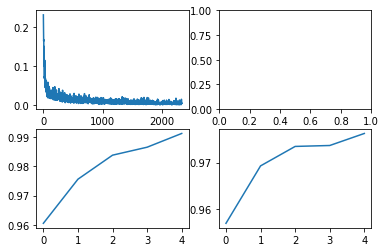

In [176]:
key = jax.random.PRNGKey(seed)
model1_params = JAX_NN_init([784,256,256,10],key)

lr,epochs = 0.09,5

train(model1_params, epochs, lr, train_loader)

#References

The following blogpost provided background information about multivariate normal distribution and using Cholesky Decomposition to obtain MVN samples.<br/>
https://juanitorduz.github.io/multivariate_normal/<br/>
Since the problem statement involved not using jax.random.normal, Box Muller approach was used. The following medium article goes into detail, the various methods to randomly sample from a standard normal distribution(like the Marsaglia polar method and Box muller approach), and the under-the-hood working of various random number generators used in libraries like numpy<br/>
https://medium.com/mti-technology/how-to-generate-gaussian-samples-347c391b7959

The following video series by AI Epiphany was very helpful to understand the main concepts of JAX like *vmap, grad, jit* and most importantly *pytrees*. The concept of *tree_map()* and *tree_multimap()* was tricky to grasp at first. <br/>
https://www.youtube.com/watch?v=SstuvS-tVc0 <br/>
https://github.com/gordicaleksa/get-started-with-JAX